<a href="https://colab.research.google.com/github/JairoRotava/UFPEL/blob/main/aed/Semana_4_exercicios_AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 4 - Estruturas não-lineares - AB

## AB - Arvore B

In [ ]:
# Instala graphviz. Só precisa fazer uma vez
!pip install graphviz

You should consider upgrading via the '/home/jairo/opencv-course/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
# Codigo original retirado de: https://www.programiz.com/dsa/b-tree
# Codigo alterado consideravelmente para bater com apresentação e corrigir erros
# Adicionado visualização com graphviz

import graphviz
import sys


# Deleting a key on a B-tree in Python


# Btree node
class BTreeNode:
    def __init__(self, leaf=False):
        self.leaf = leaf
        self.keys = []
        self.child = []


class BTree:
    def __init__(self, t):
        self.root = BTreeNode(True)
        self.t = t        

    # Insert a key
    def insert(self, k):
        print("Insere {}".format(k))
        r = self.root
        if len(r.keys) == (2 * self.t) - 1:
            print("Raiz cheia. Divide")
            s = BTreeNode()
            self.root = s
            s.leaf = False
            s.child.insert(0, r)
            self.split_child(s, 0)
            self.insert_non_full(s, k)
            self.print_pretty_tree()
        else:
            self.insert_non_full(r, k)
            self.print_pretty_tree()

    def insert_old(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BTreeNode()
            self.root = temp
            temp.child.insert(0, root)
            self.split_child(temp, 0)
            self.insert_non_full(temp, k)
        else:
            self.insert_non_full(root, k)

    # Insert non full
    def insert_non_full(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append(None)
            while i >= 0 and k < x.keys[i]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k < x.keys[i]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split_child(x, i)
                if k > x.keys[i]:
                    i += 1
            self.insert_non_full(x.child[i], k)

        # Insert non full

    def insert_non_full_old(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append(None)
            while i >= 0 and k < x.keys[i]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k < x.keys[i]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split_child(x, i)
                if k > x.keys[i]:
                    i += 1
            self.insert_non_full(x.child[i], k)

    # Split the child
    def split_child_new(self, x, i):
        t = self.t
        y = x.child[i]
        z = BTreeNode(y.leaf)
        z.keys = y.keys[0: t - 1]
        if not y.leaf:
            z.child = y.child[t: (2 * t)]

        z = BTreeNode(y.leaf)
        x.child.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])
        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]

    # Split the child
    def split_child(self, x, i):
        t = self.t
        y = x.child[i]
        z = BTreeNode(y.leaf)
        x.child.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])

        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]
        if not y.leaf:
            z.child = y.child[t: 2 * t]
            y.child = y.child[0: t]

    def delete(self, k):
        print("Remove {}".format(k))
        self.delete_helper(self.root, k)
        self.print_pretty_tree()

    # Delete a node
    def delete_helper(self, x, k):
        t = self.t
        i = 0
        while i < len(x.keys) and k > x.keys[i]:
            i += 1
        if x.leaf:
            if i < len(x.keys) and x.keys[i] == k:
                x.keys.pop(i)
                return
            return

        if i < (len(x.keys)) and x.keys[i] == k:
            return self.delete_internal_node(x, k, i)
        elif len(x.child[i].keys) >= t:
            self.delete_helper(x.child[i], k)
        else:
            if i != 0 and i < (len(x.child) - 1):
                if len(x.child[i - 1].keys) >= t:
                    self.delete_sibling(x, i, i - 1)
                elif len(x.child[i + 1].keys) >= t:
                    self.delete_sibling(x, i, i + 1)
                else:
                    self.delete_merge(x, i, i + 1)
            elif i == 0:
            # Primeiro elemento?
                if len(x.child[i + 1].keys) >= t:
                    self.delete_sibling(x, i, i + 1)
                else:
                    self.delete_merge(x, i, i + 1)
            elif i == len(x.child) - 1:
            # ultimo elemento?
                if len(x.child[i - 1].keys) >= t:
                    self.delete_sibling(x, i, i - 1)
                    #BUG? Precisa de i = i -1?
                else:
                    self.delete_merge(x, i, i - 1)
                    i = i - 1

            self.delete_helper(x.child[i], k)

    def delete_old(self, x, k):
        t = self.t
        i = 0
        while i < len(x.keys) and k[0] > x.keys[i][0]:
            i += 1
        if x.leaf:
            if i < len(x.keys) and x.keys[i][0] == k[0]:
                x.keys.pop(i)
                return
            return

        if i < len(x.keys) and x.keys[i][0] == k[0]:
            return self.delete_internal_node(x, k, i)
        elif len(x.child[i].keys) >= t:
            self.delete(x.child[i], k)
        else:
            if i != 0 and i + 2 < len(x.child):
                if len(x.child[i - 1].keys) >= t:
                    self.delete_sibling(x, i, i - 1)
                elif len(x.child[i + 1].keys) >= t:
                    self.delete_sibling(x, i, i + 1)
                else:
                    self.delete_merge(x, i, i + 1)
            elif i == 0:
                if len(x.child[i + 1].keys) >= t:
                    self.delete_sibling(x, i, i + 1)
                else:
                    self.delete_merge(x, i, i + 1)
            elif i + 1 == len(x.child):
                if len(x.child[i - 1].keys) >= t:
                    self.delete_sibling(x, i, i - 1)
                else:
                    self.delete_merge(x, i, i - 1)
            self.delete(x.child[i], k)

    # Delete internal node
    def delete_internal_node(self, x, k, i):
        t = self.t
        if x.leaf:
            if x.keys[i] == k:
                x.keys.pop(i)
                return
            return

        if len(x.child[i].keys) >= t:
            x.keys[i] = self.delete_predecessor(x.child[i])
            return
        elif len(x.child[i + 1].keys) >= t:
            x.keys[i] = self.delete_successor(x.child[i + 1])
            return
        else:
            self.delete_merge(x, i, i + 1)
            self.delete_internal_node(x.child[i], k, self.t - 1)

    def delete_internal_node_old(self, x, k, i):
        t = self.t
        if x.leaf:
            if x.keys[i][0] == k[0]:
                x.keys.pop(i)
                return
            return

        if len(x.child[i].keys) >= t:
            x.keys[i] = self.delete_predecessor(x.child[i])
            return
        elif len(x.child[i + 1].keys) >= t:
            x.keys[i] = self.delete_successor(x.child[i + 1])
            return
        else:
            self.delete_merge(x, i, i + 1)
            self.delete_internal_node(x.child[i], k, self.t - 1)

    # Delete the predecessor
    def delete_predecessor(self, x):
        if x.leaf:
            return x.keys.pop()
        n = len(x.keys) - 1
        if len(x.child[n].keys) >= self.t:
            self.delete_sibling(x, n + 1, n)
        else:
            self.delete_merge(x, n, n + 1)
        return self.delete_predecessor(x.child[n])

    # Delete the successor
    def delete_successor(self, x):
        if x.leaf:
            return x.keys.pop(0)
        if len(x.child[1].keys) >= self.t:
            self.delete_sibling(x, 0, 1)
        else:
            self.delete_merge(x, 0, 1)
        return self.delete_successor(x.child[0])

    # Delete resolution
    def delete_merge(self, x, i, j):
        cnode = x.child[i]

        if j > i:
            rsnode = x.child[j]
            cnode.keys.append(x.keys[i])
            for k in range(len(rsnode.keys)):
                cnode.keys.append(rsnode.keys[k])
                if len(rsnode.child) > 0:
                    cnode.child.append(rsnode.child[k])
            if len(rsnode.child) > 0:
                cnode.child.append(rsnode.child.pop())
            new = cnode
            x.keys.pop(i)
            x.child.pop(j)
        else:
            lsnode = x.child[j]
            lsnode.keys.append(x.keys[j])
            for k in range(len(cnode.keys)):
                lsnode.keys.append(cnode.keys[k])
                if len(lsnode.child) > 0:
                    lsnode.child.append(cnode.child[k])
            if len(lsnode.child) > 0:
                lsnode.child.append(cnode.child.pop())
            new = lsnode
            x.keys.pop(j)
            x.child.pop(i)

        if x == self.root and len(x.keys) == 0:
            self.root = new

    # Delete the sibling
    def delete_sibling(self, x, i, j):
        cnode = x.child[i]
        if i < j:
            rsnode = x.child[j]
            cnode.keys.append(x.keys[i])
            x.keys[i] = rsnode.keys[0]
            if len(rsnode.child) > 0:
                cnode.child.append(rsnode.child[0])
                rsnode.child.pop(0)
            rsnode.keys.pop(0)
        else:
            lsnode = x.child[j]
            cnode.keys.insert(0, x.keys[i - 1])
            x.keys[i - 1] = lsnode.keys.pop()
            if len(lsnode.child) > 0:
                cnode.child.insert(0, lsnode.child.pop())

    # Print the tree
    def print_tree(self, x, l=0):
        print("Level ", l, " ", len(x.keys), end=":")
        for i in x.keys:
            print(i, end=" ")
        print()
        l += 1
        if len(x.child) > 0:
            for i in x.child:
                self.print_tree(i, l)
                
    def insert_list(self, values):
        for v in values:
            self.insert(v)
            
    def delete_list(self, values):
        for v in values:
            self.delete(v)

    
        # Print the tree
    def print_pretty_tree(self):
        def add_node(x, l=0, dot = None):
            if dot is None:
                dot = graphviz.Digraph()

            #print("Level ", l, " ", len(x.keys), end=":")
            label = ""
            #for i in x.keys:
            for iteration, i in enumerate(x.keys):
                label = label + "<f{}> ".format(iteration) + "| " +  str(i) + "| "
                #print(i, end=" ")
            label = label + "<f{}> ".format(len(x.keys))
            #print(label)
            dot.node(name=str(x), label=label, shape="record")
            
            #display(dot)
            l += 1
            if len(x.child) > 0:
                #for i in x.child:
                for iteration, i in enumerate(x.child):
                    edge = str(x) + ":f{}".format(iteration)
                    #print(i)
                    dot.edge(str(x) + ":f{}".format(iteration), str(i))
                    dot = add_node(i, l, dot)
            return dot

   
        dot = add_node(self.root)
        
        
        display(dot)
        

# S162 Exemplo - AB de ordem 2. Inserir 20, 40, 10, 30, 15, 35, 7, 26, 18, 22, 5, 42, 13, 46, 27, 8, 32, 38, 24, 45, 25

Insere 20


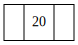

Insere 40


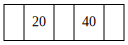

Insere 10


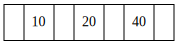

Insere 30
Raiz cheia. Divide


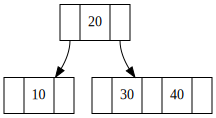

Insere 15


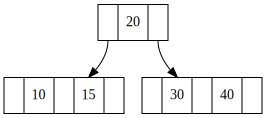

Insere 35


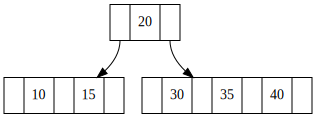

Insere 7


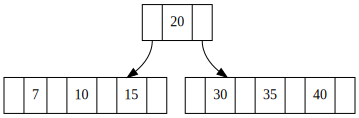

Insere 26


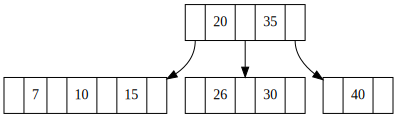

Insere 18


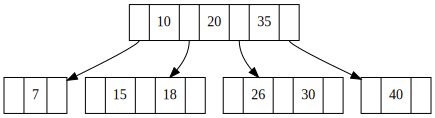

Insere 22
Raiz cheia. Divide


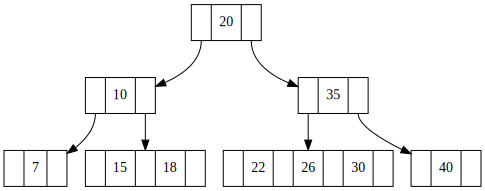

Insere 5


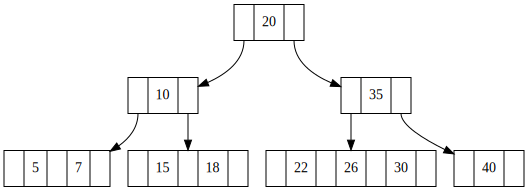

Insere 42


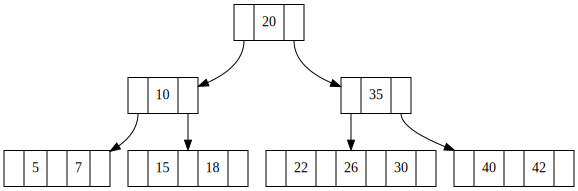

Insere 13


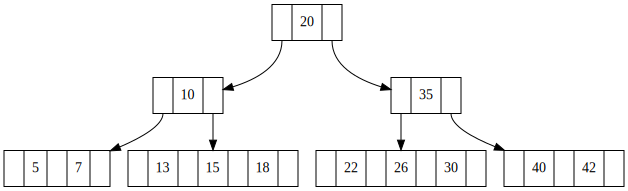

Insere 46


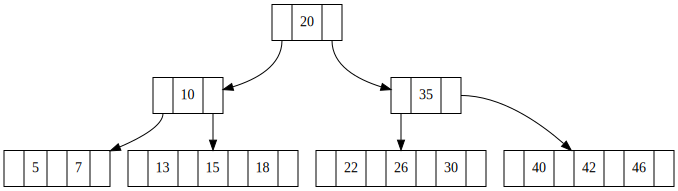

Insere 27


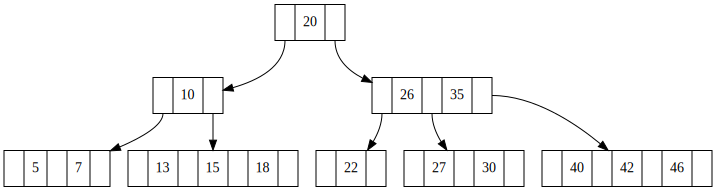

Insere 8


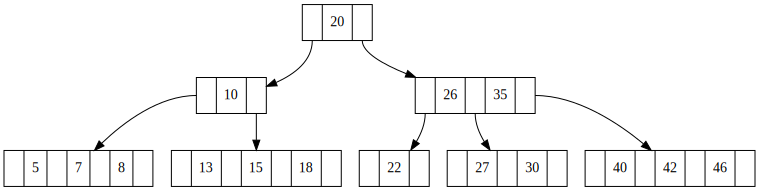

Insere 32


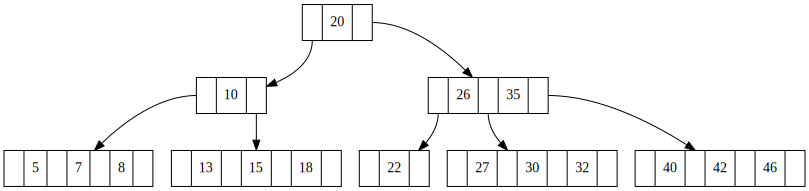

Insere 38


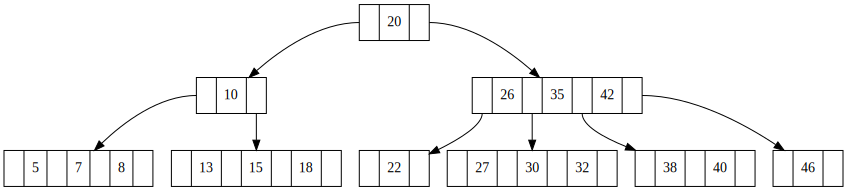

Insere 24


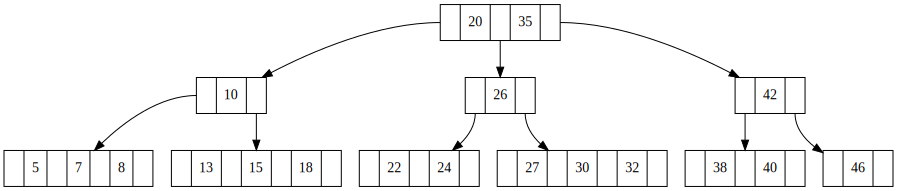

Insere 45


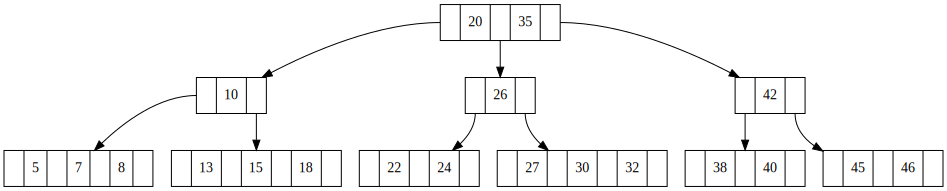

Insere 25


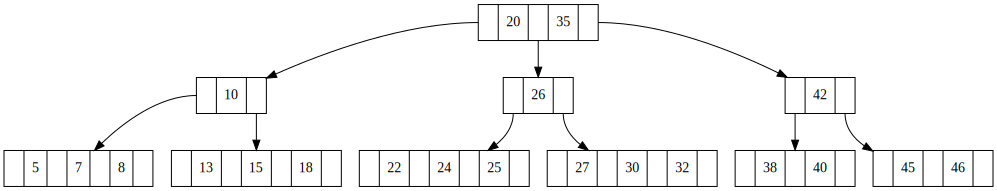

In [ ]:
#https://www.cs.usfca.edu/~galles/visualization/BTree.html
# ordem 2 igual max degree=4 preemptive split/merge setado

# Algortimo do slide é diferento do livro. No livro uma arvore de ordem b tem tamanho b-1 e 2*b-1.
# No slide o tamanhao é b e 2b. O algoritmo implementado não funciona com b e 2b :-( )
# Algoritmo tb divide preemtivamente os nós superiores, ou seja, na hora de inserir se o nós superior ja estiver cheio
#  ele é dividido mesmo que a chave não entre ali. Isso é feito para não precisar descer e depois subir a arvore
#  corrigindo. Dessa forma é garantido que o nó superior tem espaço caso seja necessário.

b_tree = BTree(2)
values = [20, 40, 10, 30, 15, 35, 7, 26, 18, 22, 5, 42, 13, 46, 27, 8, 32, 38, 24, 45, 25]
b_tree.insert_list(values)

# S182 Exemplo: remover 25, 45, 24

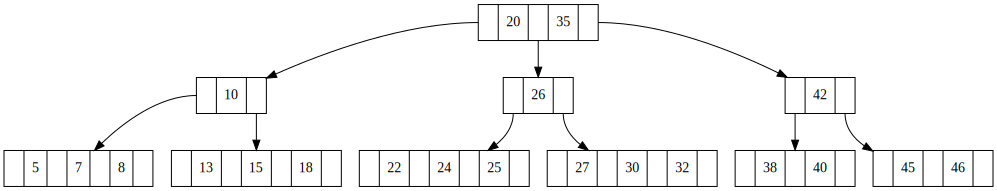

Remove 25


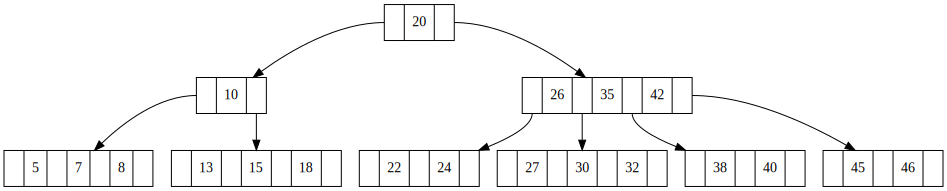

Remove 45


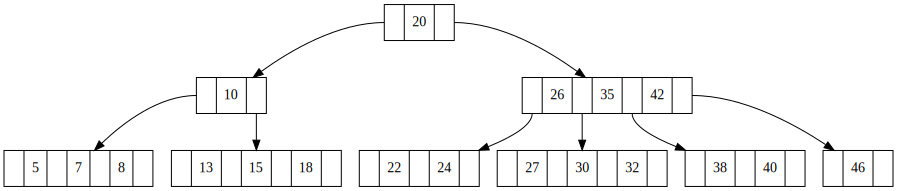

Remove 24


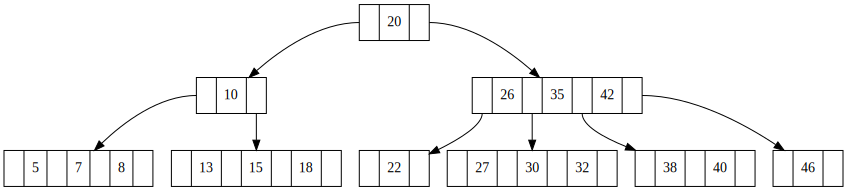

In [ ]:
b_tree.print_pretty_tree()
b_tree.delete_list([25, 45, 24])

# S197E1 Considere a arvore AB do slide anterior. Desenhe as novas ABs depois de remover cada uma das seguintes chaves: 38, 32, 8, 27, 46, 13, 42, 5, 22, 18, 26, 7, 35, 15

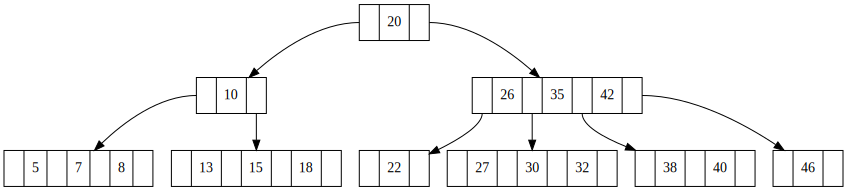

Remove 38


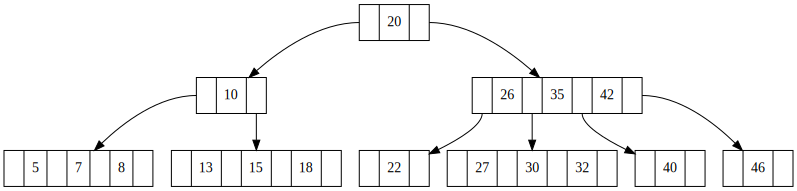

Remove 32


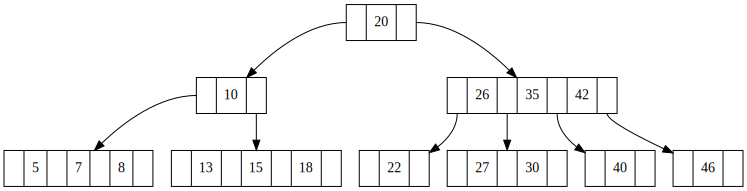

Remove 8


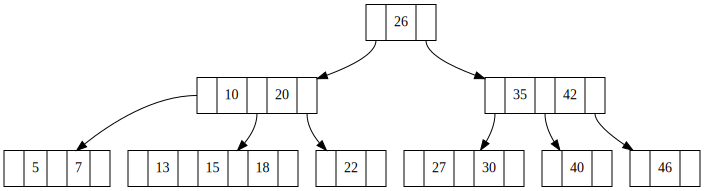

Remove 27


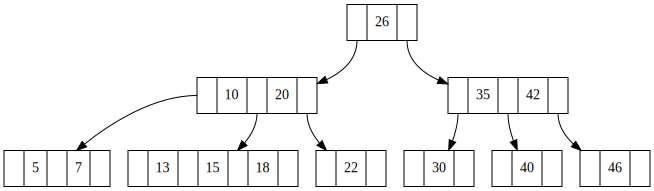

Remove 46


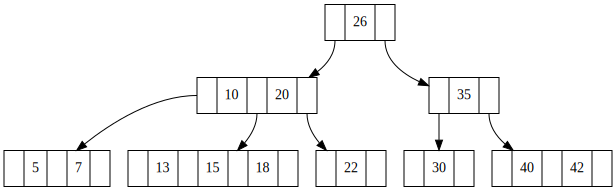

Remove 13


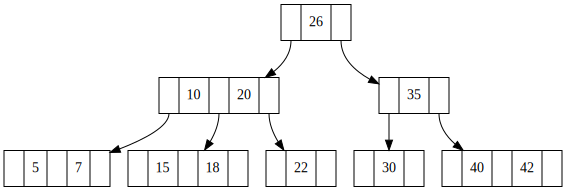

Remove 42


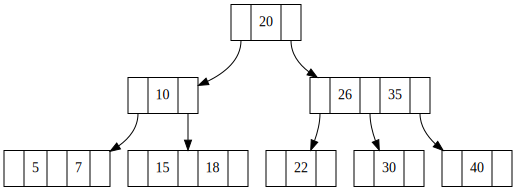

Remove 5


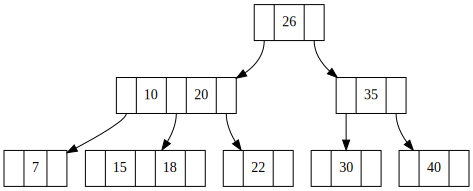

Remove 22


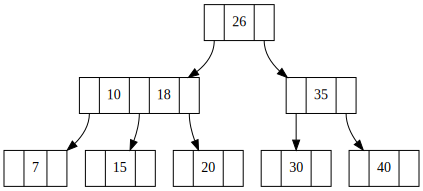

Remove 18


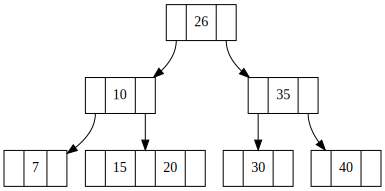

Remove 26


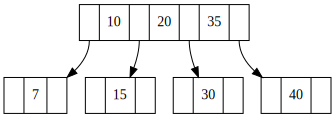

Remove 7


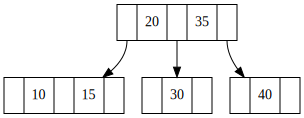

Remove 35


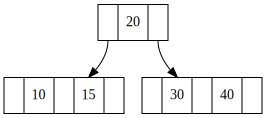

Remove 15


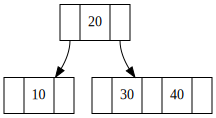

In [ ]:
b_tree.print_pretty_tree()
b_tree.delete_list([38, 32, 8, 27, 46, 13, 42, 5, 22, 18, 26, 7, 35, 15])